In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import random
import array as arr
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Patch

In [2]:
# Preprocessing

# Import moisture stress data (Drought Index)
moisture_stress = pd.read_csv(
    "../data/MMDI.csv",
    names=[
        "LON",
        "LAT",
        "ICOHORT",
        "POTVEG",
        "SUBTYPE",
        "MONTH",
        "YEAR",
        "AET",
        "PET",
        "AET/PET",
        "PET-AET/PET",
        "THETA",
    ],
)

moisture_stress = moisture_stress.query("MONTH >= 5 & MONTH <= 10 ")


mean_moisture_stress = (
    moisture_stress.groupby(["LON", "LAT", "POTVEG", "SUBTYPE", "YEAR"])
    .agg(
        {
            "AET": "sum",
            "PET": "sum",
            "AET/PET": "mean",
            "PET-AET/PET": "sum",
            "THETA": "mean",
        }
    )
    .round(3)
)

# save mean annual values
mean_moisture_stress.to_csv("../data/MDI.csv", index=True, header=False)

# Import moisture stress data (Drought Index)
moisture_stress = pd.read_csv(
    "../data/MDI.csv",
    names=[
        "LON",
        "LAT",
        "POTVEG",
        "SUBTYPE",
        "YEAR",
        "AET",
        "PET",
        "AET/PET",
        "(PET-AET)/PET",
        "THETA",
    ],
)

# Import climate data
climate = pd.read_csv(
    "../data/temp-gdd-prec.csv",
    names=["LON", "LAT", "YEAR", "T_MAX", "T_MIN", "GDD", "TOTAL_PREC"],
)

# Import climate limits data
climate_limits = pd.read_csv(
    "../data/bio_limit.csv",
    names=[
        "POTVEG",
        "SUBTYPE",
        "MIN_GDD",
        "max_GDD",
        "Tc",
        "Tw",
        "MIN_PREC",
        "MIN_AET/PET",
    ],
)

# Output Cols
var_cols = [
    "LON",
    "LAT",
    "TMPVARNAME",
    "ICOHORT",
    "STANDAGE",
    "POTVEG",
    "CURRENTVEG",
    "SUBTYPE",
    "CMNT",
    "PSIPLUSC",
    "QLCON",
    "CAREA",
    "SUBAREA",
    "YEAR",
    "TOTAL",
    "MAX",
    "AVE",
    "MIN",
    "JAN",
    "FEB",
    "MAR",
    "APR",
    "MAY",
    "JUN",
    "JUL",
    "AUG",
    "SEP",
    "OCT",
    "NOV",
    "DEC",
    "REGION",
]

# Import NPP data
npp = pd.read_csv("../data/NPP.csv", names=var_cols)
npp["NPP"] = npp["TOTAL"]  # add NPP column

# Import VEGC data
vegc = pd.read_csv("../data/VEGC.csv", names=var_cols)
vegc["NPP"] = npp["TOTAL"]  # add NPP column

# Import NEP data
nep = pd.read_csv("../data/NEP.csv", names=var_cols)
nep["NPP"] = npp["TOTAL"]  # add NPP column

# Import AVAILN data
availn = pd.read_csv("../data/AVAILN.csv", names=var_cols)
availn["NPP"] = npp["TOTAL"]  # add NPP column

# Import GPP data
gpp = pd.read_csv("../data/GPP.csv", names=var_cols)
gpp["NPP"] = npp["TOTAL"]  # add NPP column

# Import H2OYIELD data
h2oyield = pd.read_csv("../data/H2OYIELD.csv", names=var_cols)
h2oyield["NPP"] = npp["TOTAL"]  # add NPP column

# Import NETNMIN data
netnmin = pd.read_csv("../data/NETNMIN.csv", names=var_cols)
netnmin["NPP"] = npp["TOTAL"]  # add NPP column

# Import SMOIS data
smois = pd.read_csv("../data/SMOIS.csv", names=var_cols)
smois["NPP"] = npp["TOTAL"]  # add NPP column

# Import SOILORGC data
soilorgc = pd.read_csv("../data/SOILORGC.csv", names=var_cols)
soilorgc["NPP"] = npp["TOTAL"]  # add NPP column

# Import VEGINNPP data
veginnpp = pd.read_csv("../data/VEGINNPP.csv", names=var_cols)
veginnpp["NPP"] = npp["TOTAL"]  # add NPP column

# Import NCE data
nce = pd.read_csv("../data/NCE.csv", names=var_cols)
nce["NPP"] = npp["TOTAL"]  # add NPP column

In [3]:
def merge_bakeoff_variables(df, climate_limits, climate, moisture_stress):
    # Merge the dataframe with climate_limits on potveg and subtype columns
    df = df.merge(climate_limits, on=["POTVEG", "SUBTYPE"], how="left")
    # Merge the dataframe with climate on col, row and year columns
    df = df.merge(climate, on=["LON", "LAT", "YEAR"], how="left")
    # Merge the dataframe with moisture_stress on col, row, potveg, subtype and year columns
    df = df.merge(
        moisture_stress, on=["LON", "LAT", "POTVEG", "SUBTYPE", "YEAR"], how="left"
    )
    return df


# Merge NPP Datasets using the merge_bakeoff_variables function
npp_bakeoff_variables = merge_bakeoff_variables(
    npp, climate_limits, climate, moisture_stress
)
# Merge VEGC Datasets using the merge_bakeoff_variables function
vegc_bakeoff_variables = merge_bakeoff_variables(
    vegc, climate_limits, climate, moisture_stress
)
# Merge NEP Datasets using the merge_bakeoff_variables function
nep_bakeoff_variables = merge_bakeoff_variables(
    nep, climate_limits, climate, moisture_stress
)

# Merge AVAILN Datasets using the merge_bakeoff_variables function
availn_bakeoff_variables = merge_bakeoff_variables(
    availn, climate_limits, climate, moisture_stress
)

# Merge GPP Datasets using the merge_bakeoff_variables function
gpp_bakeoff_variables = merge_bakeoff_variables(
    gpp, climate_limits, climate, moisture_stress
)

# Merge H2OYIELD Datasets using the merge_bakeoff_variables function
h2oyield_bakeoff_variables = merge_bakeoff_variables(
    h2oyield, climate_limits, climate, moisture_stress
)

# Merge NETNMIN Datasets using the merge_bakeoff_variables function
netnmin_bakeoff_variables = merge_bakeoff_variables(
    netnmin, climate_limits, climate, moisture_stress
)

# Merge SMOIS Datasets using the merge_bakeoff_variables function
smois_bakeoff_variables = merge_bakeoff_variables(
    smois, climate_limits, climate, moisture_stress
)

# Merge SOILORGC Datasets using the merge_bakeoff_variables function

smois_bakeoff_variables = merge_bakeoff_variables(
    smois, climate_limits, climate, moisture_stress
)

# Merge SOILORGC Datasets using the merge_bakeoff_variables function

soilorgc_bakeoff_variables = merge_bakeoff_variables(
    soilorgc, climate_limits, climate, moisture_stress
)

# Merge VEGINNPP Datasets using the merge_bakeoff_variables function
veginnpp_bakeoff_variables = merge_bakeoff_variables(
    veginnpp, climate_limits, climate, moisture_stress
)

# Merge NCE Datasets using the merge_bakeoff_variables function
nce_bakeoff_variables = merge_bakeoff_variables(nce, climate_limits, climate, moisture_stress)

In [4]:
possible_cols = var_cols + ["NPP", "POSSIBLE"]


def calculate_possible(df, bakeoff_variables):
    df["POSSIBLE"] = (
        (bakeoff_variables["GDD"] >= bakeoff_variables["MIN_GDD"])
        & (bakeoff_variables["TOTAL_PREC"] >= bakeoff_variables["MIN_PREC"])
        & (bakeoff_variables["T_MIN"] >= bakeoff_variables["Tc"])
        & (bakeoff_variables["T_MAX"] <= bakeoff_variables["Tw"])
        & (bakeoff_variables["AET/PET"] >= bakeoff_variables["MIN_AET/PET"])
    )
    return df[possible_cols]


# Determine Possible PFTs depending on climate and moisture stress
npp_result_out = calculate_possible(npp, npp_bakeoff_variables)
vegc_result_out = calculate_possible(vegc, vegc_bakeoff_variables)
nep_result_out = calculate_possible(nep, nep_bakeoff_variables)
availn_result_out = calculate_possible(availn, availn_bakeoff_variables)
gpp_result_out = calculate_possible(gpp, gpp_bakeoff_variables)
h2oyield_result_out = calculate_possible(h2oyield, h2oyield_bakeoff_variables)
netnmin_result_out = calculate_possible(netnmin, netnmin_bakeoff_variables)
smois_result_out = calculate_possible(smois, smois_bakeoff_variables)
soilorgc_result_out = calculate_possible(soilorgc, soilorgc_bakeoff_variables)
veginnpp_result_out = calculate_possible(veginnpp, veginnpp_bakeoff_variables)
nce_result_out = calculate_possible(nce, nce_bakeoff_variables)

In [5]:
# Applying Bakeoff Logic


# Function to apply bakeoff logic to each gridcell, and return the PFT wich is possible in the gridcell and has  the maximum NPP.
# If there are no possible PFTs in the gridcell, return the PFT with the maximum NPP.
def possible_pft_with_max_NPP(group):
    # select max possible cohort in a group
    if group["POSSIBLE"].any():
        x = group[group["POSSIBLE"]]["NPP"].idxmax()

    # if no possible cohort, select max cohort in a group
    else:
        x = group["NPP"].idxmax()
    return group.loc[x]


# apply function by first grouping by col, row & year

npp_bakeoff_result = npp_result_out.groupby(["LON", "LAT", "YEAR"], sort=False).apply(
    possible_pft_with_max_NPP
)

vegc_bakeoff_result = vegc_result_out.groupby(["LON", "LAT", "YEAR"], sort=False).apply(
    possible_pft_with_max_NPP
)

nep_bakeoff_result = nep_result_out.groupby(["LON", "LAT", "YEAR"], sort=False).apply(
    possible_pft_with_max_NPP
)

availn_bakeoff_result = availn_result_out.groupby(
    ["LON", "LAT", "YEAR"], sort=False
).apply(possible_pft_with_max_NPP)
gpp_bakeoff_result = gpp_result_out.groupby(["LON", "LAT", "YEAR"], sort=False).apply(
    possible_pft_with_max_NPP
)
h2oyield_bakeoff_result = h2oyield_result_out.groupby(
    ["LON", "LAT", "YEAR"], sort=False
).apply(possible_pft_with_max_NPP)
netnmin_bakeoff_result = netnmin_result_out.groupby(
    ["LON", "LAT", "YEAR"], sort=False
).apply(possible_pft_with_max_NPP)
smois_bakeoff_result = smois_result_out.groupby(
    ["LON", "LAT", "YEAR"], sort=False
).apply(possible_pft_with_max_NPP)
soilorgc_bakeoff_result = soilorgc_result_out.groupby(
    ["LON", "LAT", "YEAR"], sort=False
).apply(possible_pft_with_max_NPP)
veginnpp_bakeoff_result = veginnpp_result_out.groupby(
    ["LON", "LAT", "YEAR"], sort=False
).apply(possible_pft_with_max_NPP)

nce_bakeoff_result = nce_result_out.groupby(["LON", "LAT", "YEAR"], sort=False).apply(possible_pft_with_max_NPP)

# Clean Dataframe
def clean_dataframe(df):
    # delete unwanted 'possible' column
    del df["POSSIBLE"]
    del df["NPP"]

    df.loc[df["ICOHORT"] > 0, "ICOHORT"] = 1
    df["SUBAREA"] = df["CAREA"]
    return df


npp_bakeoff_result = clean_dataframe(npp_bakeoff_result)
vegc_bakeoff_result = clean_dataframe(vegc_bakeoff_result)
nep_bakeoff_result = clean_dataframe(nep_bakeoff_result)
availn_bakeoff_result = clean_dataframe(availn_bakeoff_result)
gpp_bakeoff_result = clean_dataframe(gpp_bakeoff_result)
h2oyield_bakeoff_result = clean_dataframe(h2oyield_bakeoff_result)
netnmin_bakeoff_result = clean_dataframe(netnmin_bakeoff_result)
smois_bakeoff_result = clean_dataframe(smois_bakeoff_result)
soilorgc_bakeoff_result = clean_dataframe(soilorgc_bakeoff_result)
veginnpp_bakeoff_result = clean_dataframe(veginnpp_bakeoff_result)
nce_bakeoff_result = clean_dataframe(nce_bakeoff_result)

# export data to .csv

def export_to_csv(df, file_name):
    df.to_csv("../data/output_bakeoff/" + file_name, index=False, header=False)
    df.to_csv("T:/m8/kodero/runs/norway/xtran/" + file_name, index=False, header=False)


# Apply the export_to_csv function to the three datasets
export_to_csv(npp_bakeoff_result, "npp_bakeoff_result.csv")
export_to_csv(vegc_bakeoff_result, "vegc_bakeoff_result.csv")
export_to_csv(nep_bakeoff_result, "nep_bakeoff_result.csv")
export_to_csv(availn_bakeoff_result, "availn_bakeoff_result.csv")
export_to_csv(gpp_bakeoff_result, "gpp_bakeoff_result.csv")
export_to_csv(h2oyield_bakeoff_result, "h2oyield_bakeoff_result.csv")
export_to_csv(netnmin_bakeoff_result, "netnmin_bakeoff_result.csv")
export_to_csv(smois_bakeoff_result, "smois_bakeoff_result.csv")
export_to_csv(soilorgc_bakeoff_result, "soilorgc_bakeoff_result.csv")
export_to_csv(veginnpp_bakeoff_result, "veginnpp_bakeoff_result.csv")
export_to_csv(nce_bakeoff_result, "nce_bakeoff_result.csv")

In [6]:
# Logic to determine the PFT which appears the most in each gridcell after applying the Bioclimatic Limits


# Read in the NPP bakeoff result dataset
bakeoff_result = pd.read_csv(
    "../data/output_bakeoff/npp_bakeoff_result.csv", names=var_cols
)

# Split the dataset into three parts, early, mid and end century
early_century = bakeoff_result.query("YEAR <= 2045")
mid_century = bakeoff_result.query("YEAR >= 2045 & YEAR<= 2070")
end_century = bakeoff_result.query("YEAR >= 2070")

# Count which PFT appears the most after applying  Bioclimatic Limits

# Early Century
count_early_century = (
    pd.DataFrame(early_century.groupby(["LON", "LAT"])["POTVEG"].value_counts())
    .rename(columns={"POTVEG": "COUNT"})
    .reset_index()
)

# Mid Century
count_mid_century = (
    pd.DataFrame(mid_century.groupby(["LON", "LAT"])["POTVEG"].value_counts())
    .rename(columns={"POTVEG": "COUNT"})
    .reset_index()
)

# End Century
count_end_century = (
    pd.DataFrame(end_century.groupby(["LON", "LAT"])["POTVEG"].value_counts())
    .rename(columns={"POTVEG": "COUNT"})
    .reset_index()
)

# Merge the count datasets with the original datasets to get the PFT which appears the most in each gridcell
max_count_early_century = pd.merge(
    count_early_century.groupby(["LON", "LAT"]).agg({"COUNT": "max"}).reset_index(),
    count_early_century,
    on=["LON", "LAT", "COUNT"],
)
max_count_mid_century = pd.merge(
    count_mid_century.groupby(["LON", "LAT"]).agg({"COUNT": "max"}).reset_index(),
    count_mid_century,
    on=["LON", "LAT", "COUNT"],
)
max_count_end_century = pd.merge(
    count_end_century.groupby(["LON", "LAT"]).agg({"COUNT": "max"}).reset_index(),
    count_end_century,
    on=["LON", "LAT", "COUNT"],
)

# delete unwanted 'count' column
del max_count_early_century["COUNT"]
del max_count_mid_century["COUNT"]
del max_count_end_century["COUNT"]

max_count_early_century.to_csv(
    "../data/output_bakeoff/2015-2045_bakeoff.csv", index=False, header=False
)
max_count_mid_century.to_csv(
    "../data/output_bakeoff/2045-2070_bakeoff.csv", index=False, header=False
)
max_count_end_century.to_csv(
    "../data/output_bakeoff/2070-2100_bakeoff.csv", index=False, header=False
)

In [7]:
# Function to Modify PFT id for plot
def modify_potveg(df):
    new_id = {15: 30, 10: 20, 4: 5, 8: 10, 9: 15, 13: 25, 19: 35, 33: 40}
    df["POTVEG"] = df["POTVEG"].map(new_id)

    return df


# Create a dictionary to map the PFT identifiers to the new ones


potential_vegetation_early_century = modify_potveg(max_count_early_century)
potential_vegetation_mid_century = modify_potveg(max_count_mid_century)
potential_vegetation_end_century = modify_potveg(max_count_end_century)

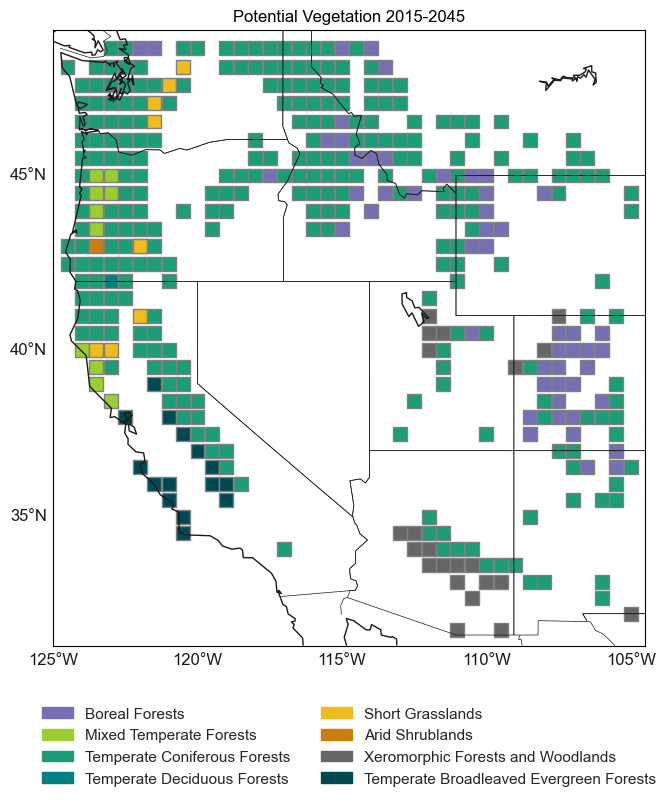

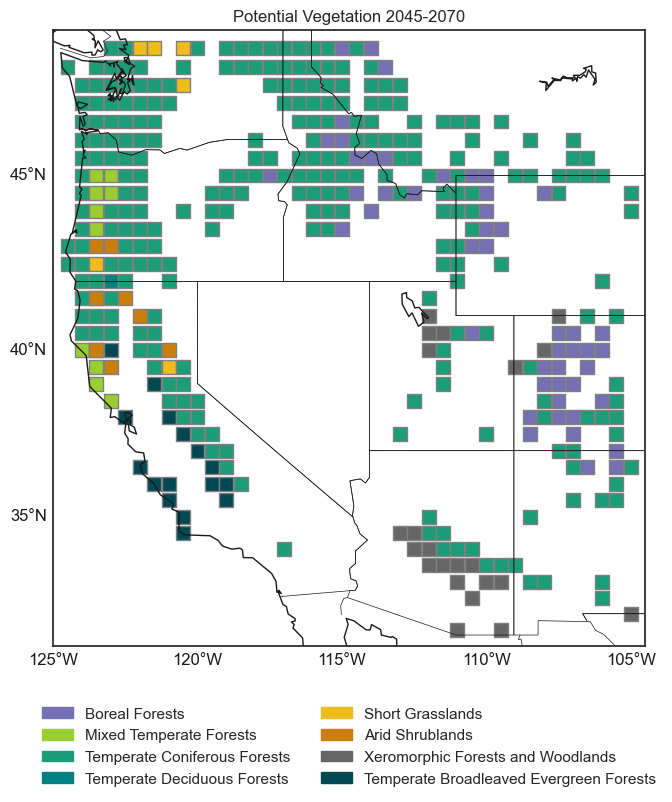

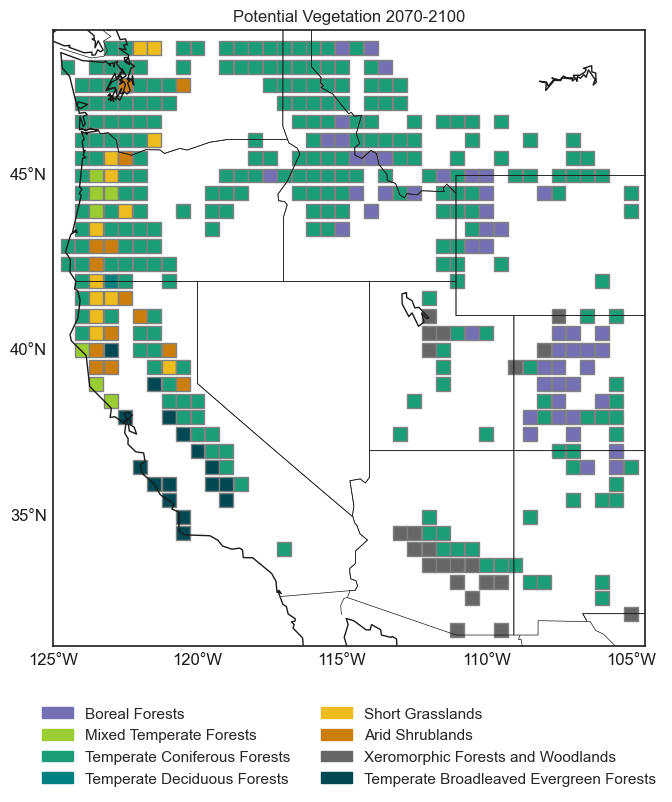

In [8]:
# Color palette
forest = ListedColormap(
    [
        "#7570b3",
        "#9ACD32",
        "#1b9d77",
        "#008080",
        "#EEBC1D",
        "#cb7e0c",
        "#666666",
        "#004953",
    ]
)


# Function to plot the results
def plot_figure(df, year_range, file_name):
    fig = plt.figure()
    fig.set_size_inches(25, 8)
    ax = fig.add_subplot(111)
    sns.set_theme(style="ticks", font="sans-serif", rc={"lines.linewidth": 2.5})
    plt.rcParams["font.size"] = 12
    m = Basemap(
        projection="mill",
        llcrnrlat=31,
        llcrnrlon=-125,
        urcrnrlat=49,
        urcrnrlon=-104.5,
        resolution="l",
    )
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()
    # Draw parallels and meridians
    lat_interval = 5
    lon_interval = 5
    parallels = np.arange(25, 50, lat_interval)
    meridians = np.arange(-130, -104.5, lon_interval)
    m.drawparallels(
        parallels, labels=[True, False, False, False], fontsize=12, linewidth=0.001
    )
    m.drawmeridians(
        meridians, labels=[False, False, False, True], fontsize=12, linewidth=0.001
    )

    x, y = m(df["LON"].values, df["LAT"].values)
    m.scatter(
        x,
        y,
        c=df["POTVEG"],
        s=100,
        cmap=forest,
        edgecolor="gray",
        marker="s",
    )
    # Create a list of labels for the different colors in the colormap
    labels = [
        "Boreal Forests",
        "Mixed Temperate Forests",
        "Temperate Coniferous Forests",
        "Temperate Deciduous Forests",
        "Short Grasslands",
        "Arid Shrublands",
        "Xeromorphic Forests and Woodlands",
        "Temperate Broadleaved Evergreen Forests",
    ]

    # Create a list of patches for the legend
    patches = [
        Patch(color=color, label=label) for color, label in zip(forest.colors, labels)
    ]
    # Add the legend to the axis
    ax.legend(
        handles=patches,
        bbox_to_anchor=(0.5, -0.25),
        loc="lower center",
        ncol=2,
        borderaxespad=0.5,
        frameon=False,
    )

    plt.title(f"Potential Vegetation {year_range[0]}-{year_range[1]}")
    plt.savefig("../figures/" + file_name, dpi=300, bbox_inches="tight")


plot_figure(potential_vegetation_early_century, [2015, 2045], "2015-2045_bakeoff.png")
plot_figure(potential_vegetation_mid_century, [2045, 2070], "2045-2070_bakeoff.png")
plot_figure(potential_vegetation_end_century, [2070, 2100], "2070-2100_bakeoff.png")